### Student Information
Name:歐羿辰

Student ID:114062540

GitHub ID:Eason12081105

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

### import library

In [32]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
import seaborn as sns

### read in dataset

In [2]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
print(df.head())

      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1     

### some info of the dataset

In [7]:
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")

num_columns = df.shape[1]
print(f"Number of columns: {num_columns}")

# Print each column title
print("\nColumn Titles:")
for column in df.columns:
    print(column)

Number of rows: 847
Number of columns: 16

Column Titles:
type
datetime
post_id
subreddit
title
author
url
upvotes
downvotes
upvote_ratio
text
subjectivity
polarity
sentiment
entities
label


### Ex1: print out the first 3 samples of the dataset

In [8]:
print(df.head(3))

      type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                                   Calls on retards   
1

### Ex2: try some querying technique
query rows 8 and 9 with their corresponding columns 3 and 4 

In [10]:
df.iloc[7:9, 2:4]

,post_id,subreddit
7,mmlhxwc,wallstreetbets
8,gllyi5z,stocks


### Ex3: Try to fetch records belonging to the ```1.0``` sentiment, and query every 10th record. Only show the first 5 records.

In [12]:
df[df["sentiment"] == 1.0][::10][0:5]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
25,comment,2025-04-12 1:26:19,mmnwe5h,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Rosebunse,https://i.redd.it/7tl6puv9waue1.jpeg,4,NaN,NaN,"You see, Target, pissing off a good chunk of y...",0.758333,0.233333,1.0,"['customer', 'base', 'chunk', 'Target', 'idea']",-1.0
56,comment,2025-04-11 13:33:07,mmk6jsw,stocks,BREAKING: China raises tariffs on U.S. goods t...,blowgrass-smokeass,https://www.reddit.com/r/stocks/comments/1jwku...,-1,NaN,NaN,"To be fair, Chinese exports to the US make up ...",0.466667,0.233333,1.0,"['portion', 'degree', 'US', 'kinda', '’', 'way...",0.0
73,comment,2025-04-11 15:32:07,mmku593,stocks,Is the market in complete denial right now?,Assaulted_Fish,https://www.reddit.com/r/stocks/comments/1jwo1...,1,NaN,NaN,"Look, the USA somehow thought a second term f...",0.460000,0.040000,1.0,"['USA', 'fool', 'Look', 'Trump', 'world', 'cul...",-1.0
96,comment,2025-04-12 2:05:07,mmo2f48,wallstreetbets,Someone post the hotline please.,Rosie3435,https://i.redd.it/tcfuu97p7bue1.jpeg,1,NaN,NaN,200k loss in a month.. haha,0.300000,0.200000,1.0,"['..', 'month', 'loss', 'haha']",-1.0


### Ex4: calculate the missing value
for the samples whose missing record is 2, their missing columns are "downvotes" and "upvote_ratio"

In [15]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

### Ex7: sentiment label distribution

<Axes: title={'center': 'sentiment label distribution'}, xlabel='label'>

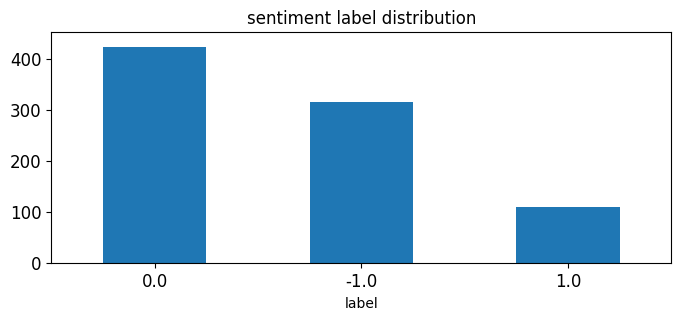

In [17]:
df.label.value_counts().plot(kind = 'bar',
                                           title = 'sentiment label distribution',
                                           ylim = [0, df.label.value_counts().max()+30], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### Ex8: distribution comparison between different sample size

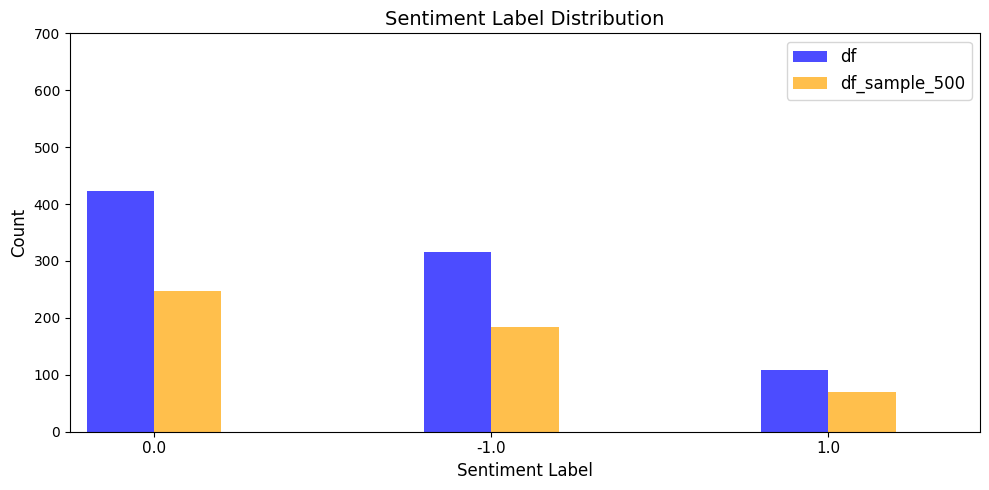

In [22]:
df_sample_500 = df.sample(n=500, random_state=42)

df_counts = df.label.value_counts()
df_sample_counts = df_sample_500.label.value_counts()

fig, ax = plt.subplots(figsize=(10, 5))

df_counts.plot(kind='bar', 
              color='blue', 
              alpha=0.7, 
              ax=ax, 
              width=0.2, 
              position=1, 
              label='df')

df_sample_counts.plot(kind='bar', 
                     color='orange', 
                     alpha=0.7, 
                     ax=ax, 
                     width=0.2, 
                     position=0, 
                     label='df_sample_500')

ax.set_title('Sentiment Label Distribution', fontsize=14)
ax.set_ylim([0, 700])
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Sentiment Label', fontsize=12)
ax.legend(fontsize=12)
plt.xticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()

### Ex9: analyze the first record of dataframe

In [27]:
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(df['text'][0])

['calls', 'on', 'retards']

### Ex10: 

In [29]:
df_counts = count_vect.fit_transform(df.text)
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

### Ex11: show the most 20 frequent terms

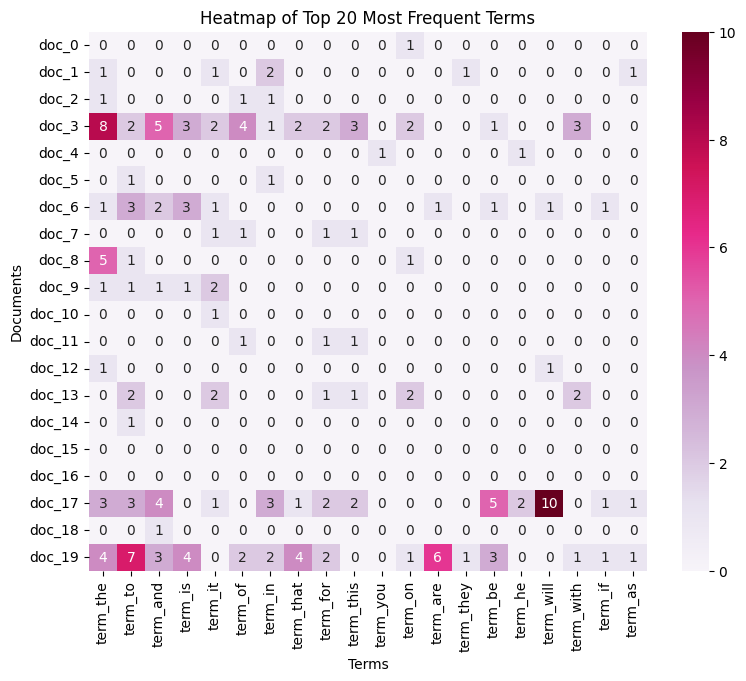

In [33]:
# Answer here
# calculate the most frequent terms to make the chart more meaningful

term_frequencies = np.sum(df_counts.toarray(), axis=0)  # Sum over all documents
sorted_indices = np.argsort(term_frequencies)[::-1]  # Sort indices by frequency in descending order

top_20_indices = sorted_indices[:20]
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[top_20_indices]]
plot_y = ["doc_" + str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, top_20_indices].toarray()  # Use the top 20 terms

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

vmax_value = np.max(plot_z)

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=vmax_value, annot=True)
plt.title("Heatmap of Top 20 Most Frequent Terms")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

### Ex12: term frequency visualization with plotly

In [34]:
# Answer here
import plotly.express as px

# Prepare the data
term_data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

# Create the bar chart
fig = px.bar(term_data, 
             x='Term', 
             y='Frequency', 
             title='Term Frequencies',
             labels={'Term': 'Terms', 'Frequency': 'Frequency'},
             template='plotly_white')

# Customize the layout
fig.update_layout(
    xaxis=dict(tickangle=90),  # Rotate x-axis labels
    height=600,  # Adjust height
    width=1200,  # Adjust width
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16
)

# Show the plot
fig.show()

### Ex13: keep the most 30 frequent terms

In [35]:
# Answer here
term_frequencies = np.sum(df_counts.toarray(), axis=0)  # Sum over all documents

top_n = 30  # keep 30 most frequent terms
sorted_indices = np.argsort(term_frequencies)[::-1] 
top_indices = sorted_indices[:top_n]

X_counts_reduced = df_counts[:, top_indices]

top_terms = count_vect.get_feature_names_out()[top_indices]

term_data = pd.DataFrame({
    'Term': top_terms,  # The most frequent terms after filtering
    'Frequency': term_frequencies[top_indices]  # Corresponding frequencies
})

fig = px.bar(term_data, 
             x='Term', 
             y='Frequency', 
             title='Top Frequent Terms After Filtering',
             labels={'Term': 'Terms', 'Frequency': 'Frequency'},
             template='plotly_white')

fig.update_layout(
    xaxis=dict(tickangle=90),
    height=600,
    width=1200, 
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16
)

fig.show()


### Ex14: sort 300 terms

In [36]:
# Answer here
term_frequencies = np.sum(df_counts.toarray(), axis=0)  # Sum over all documents

top_n = 300  # keep 300 most frequent terms
sorted_indices = np.argsort(term_frequencies)[::-1] 
top_indices = sorted_indices[:top_n]

X_counts_reduced = df_counts[:, top_indices]

top_terms = count_vect.get_feature_names_out()[top_indices]

term_data = pd.DataFrame({
    'Term': top_terms,  # The most frequent terms after filtering
    'Frequency': term_frequencies[top_indices]  # Corresponding frequencies
})

fig = px.bar(term_data, 
             x='Term', 
             y='Frequency', 
             title='Top Frequent Terms After Filtering',
             labels={'Term': 'Terms', 'Frequency': 'Frequency'},
             template='plotly_white')

fig.update_layout(
    xaxis=dict(tickangle=90),
    height=600,
    width=1200, 
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16
)

fig.show()


### Ex15: log frequency

In [37]:
# Answer here
# obserbation: After the log transformation, the differences between each term have been reduced.
term_frequencies = np.sum(df_counts.toarray(), axis=0)
term_frequencies_log = np.log1p(term_frequencies)  # Use log1p to handle zero frequencies safely

top_n = 300
sorted_indices = np.argsort(term_frequencies)[::-1]
top_indices = sorted_indices[:top_n]

X_counts_reduced = df_counts[:, top_indices]

top_terms = count_vect.get_feature_names_out()[top_indices]

term_data = pd.DataFrame({
    'Term': top_terms,  # The most frequent terms after filtering
    'Frequency': term_frequencies_log[top_indices]  # Log-transformed frequencies
})

fig = px.bar(term_data, 
             x='Term', 
             y='Frequency', 
             title='Top Frequent Terms After Filtering (Log-Transformed)',
             labels={'Term': 'Terms', 'Frequency': 'Log(Frequency)'},
             template='plotly_white')

fig.update_layout(
    xaxis=dict(tickangle=90),
    height=600,
    width=1200, 
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16
)

fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here